<a href="https://colab.research.google.com/github/ChrisWhit3/spotify-vision/blob/main/spotify_vision_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Christopher White

Professor Filatova

CST 3512

# Spotify 'Vision' Project - Visualizing Streaming History


> I wanted to create a visual summary of the Spotify listening history of my friends, similar to Spotify's yearly 'Wrapped' feature which shows users their year on the platform, including their favorite artists, tracks, playlists, genres...

---


# Pre-reqs:   
* Collect json files from friends on their year long Spotify listening history
* Add json file to github repo to use curl command to put into local storage in notebook
* Create data frames for each friends' listening history



---

# Objectives:
* Find top 5 songs by sum playtime (turn ms -> minutes/hrs)
* Find top 5 artist by sum playtime (turn ms -> minutes/hrs)
* Plot total listening
* Plot listening of top artists and top songs over the year
* Plot artist birth place for each top artist on world map

# Process:     
Dataframe manipulation:   
* Read json files into separate dataframes
* Find top 5 highest sum(playtime) group by song for each friend
* Find top 5 highest sum(playtime) group by artist for each friend

Folium:    
* Get CSV of world cities
* Specify starting scale
* Specify appearance
* Create dataframe containing birth cities for each artist

---

# Visualizing:     
Pivot tables/Histogram:
* Show top 5 artists by playtime (sum playtime, sort descending, limit to 5)
* Show top 10 songs by playtime (sum playtime, sort descending, limit to 5)

Time series Plots:    
* Top 5 artists playtime over the course of the year
* Top 5 songs playtime over the course of the year

Geo Analysis:    
* Create markers for each top artist
  * Color - correspond to friend
  * Artist Name
  * Artist Country



In [1]:
!pip3 install requests # Install updated requests library

In [2]:
import pandas as pd # Import pandas library
import numpy as np # Import numpy library
import os # Import os library

In [3]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Change the size of figure drawn
rcParams['figure.figsize'] = (16, 6)

plt.rcParams['axes.facecolor'] = 'navy'
plt.rcParams['figure.facecolor'] = 'white'

In [4]:
# Clone streaming history data repository into local directory
!git clone https://github.com/ChrisWhit3/spotify-vision.git

Cloning into 'spotify-vision'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 47 (delta 6), reused 2 (delta 2), pack-reused 35
Unpacking objects: 100% (47/47), done.


# Importing and cleaning of streaming history files for analysis

In [5]:
'''

  Function takes the path to the folder containing the streaming history files and creates streaming history dataframe for each person

  Takes directory path from total sorted list
  Get person number in the form of the string 'Streaming History#_#.json'
  Create dictionary with key id and dataframe
  
'''

def create_dataframe_from_streaming_files(directory_path):
  
  # Check that path given is valid
  if os.path.isdir(directory_path):
    if len(os.listdir(directory_path)) != 0: # Check that directory is not empty
 
      # Dictionary to organize multiple streaming history files by person
      num_person_files = {}
      for file in sorted(os.listdir(directory_path)):
        # df_name = file.split("_")
        person = int(file.split("_")[0].split('y',1)[1])
        #print(person)
        if person in num_person_files:
          num_person_files[person].append(pd.read_json(f'{directory_path}'+file))
        else:
          num_person_files[person] = [(pd.read_json(f'{directory_path}'+file))]

      # Create dictionary to hold concatinated streaming history for each person
      streaming_dataframes = {}
      for k,v in num_person_files.items():
        streaming_dataframes[k] = pd.concat(v)

      return streaming_dataframes
        
    else:
      return 'directory is empty'

  else:
    return 'no directory at path'



# Apply function to path of streaming history folder
streaming_dataframes = create_dataframe_from_streaming_files('spotify-vision/streaming_history_data/')

In [6]:
streaming_dataframes

{0:                endTime  ... msPlayed
 0     2020-11-30 00:01  ...   205484
 1     2020-11-30 00:04  ...   181688
 2     2020-11-30 00:37  ...    65837
 3     2020-11-30 00:40  ...   181661
 4     2020-11-30 00:44  ...   247058
 ...                ...  ...      ...
 1482  2021-11-30 14:20  ...   203288
 1483  2021-11-30 15:00  ...  2393508
 1484  2021-11-30 15:00  ...    41730
 1485  2021-11-30 17:02  ...   565120
 1486  2021-11-30 19:12  ...   353850
 
 [11487 rows x 4 columns], 1:                endTime  ... msPlayed
 0     2020-11-07 01:29  ...     6005
 1     2020-11-29 22:39  ...   199638
 2     2020-11-30 20:19  ...     2670
 3     2020-11-30 20:23  ...    12329
 4     2020-11-30 20:23  ...   207133
 ...                ...  ...      ...
 2068  2021-11-30 18:35  ...        0
 2069  2021-11-30 18:35  ...   176160
 2070  2021-11-30 18:36  ...      812
 2071  2021-11-30 18:36  ...    45975
 2072  2021-11-30 18:39  ...   169552
 
 [22073 rows x 4 columns], 2:                endTime

In [7]:
print(streaming_dataframes.items())

dict_items([(0,                endTime  ... msPlayed
0     2020-11-30 00:01  ...   205484
1     2020-11-30 00:04  ...   181688
2     2020-11-30 00:37  ...    65837
3     2020-11-30 00:40  ...   181661
4     2020-11-30 00:44  ...   247058
...                ...  ...      ...
1482  2021-11-30 14:20  ...   203288
1483  2021-11-30 15:00  ...  2393508
1484  2021-11-30 15:00  ...    41730
1485  2021-11-30 17:02  ...   565120
1486  2021-11-30 19:12  ...   353850

[11487 rows x 4 columns]), (1,                endTime  ... msPlayed
0     2020-11-07 01:29  ...     6005
1     2020-11-29 22:39  ...   199638
2     2020-11-30 20:19  ...     2670
3     2020-11-30 20:23  ...    12329
4     2020-11-30 20:23  ...   207133
...                ...  ...      ...
2068  2021-11-30 18:35  ...        0
2069  2021-11-30 18:35  ...   176160
2070  2021-11-30 18:36  ...      812
2071  2021-11-30 18:36  ...    45975
2072  2021-11-30 18:39  ...   169552

[22073 rows x 4 columns]), (2,                endTime       art

In [8]:
'''
  Function will convert msPlayed column to secPlayed, minPlayed, and hrPlayed columns

  Takes in dataframe
  Returns dataframe with calculated columns added
  --------------------------------------
'''
def add_ms_conversion_columns(dataframe):
  # Convert miliseconds to seconds and save as new seconds played column
  dataframe['secPlayed'] = dataframe['msPlayed'] / (1000)

  # Convert miliseconds to minutes and save as new minutes played column
  dataframe['minPlayed'] = dataframe['msPlayed'] / (1000 * 60)

  # Convert miliseconds to minutes and save as new minutes played column
  dataframe['hrPlayed'] = dataframe['msPlayed'] / (1000 * 60 * 60)

  return dataframe

In [9]:
'''
  Function will strip all object datatype column values of leading and trailing whitespace
  --------------------------------------
'''
def strip_column_value_whitespace(df):

  # Select columns that have the datatype equal to 'object'
  object_cols = df.select_dtypes(object).columns

  # Apply function to turn array of columns to numeric datatype
  df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

  return df

In [10]:
'''
  For this analysis we would like to only look at tracks

  Function will remove podcast listens

  Based on observed outlier listen times and user input - future analysis will use Spotify API to remove all listens where type is podcast
'''

def remove_podcast_entries(df):
  list_of_podcasts_to_remove = ['The Daily', 'Call Her Daddy', 
                                'Comforting Sounds', 'Crime Junkie', 
                                'Philosophy Bites', 'Pass the Compassion',
                                'Conspiracy Theories', 'Keeping Up With Kayla',
                                'Today in True Crime', 'Good For You',
                                'You\'re Wrong About', 'The Joe Rogan Experience',
                                'Ologies with Alie Ward', 'Hidden Brain',
                                'No Stupid Questions', 'Stuff You Should Know',
                                'Infamous: The Story of YNW Melly', 'Mythology',
                                'The Journal.','MarketFoolery', 'The Big Loop'
                                ]
  df.drop(df[df['artistName'].isin(list_of_podcasts_to_remove)].index, inplace = True)
  
  return df



In [11]:
'''
  Establish a 'Meaningful Listen':

  Getting through a verse and a chorus is enough time to feel out a song
  (although I may argue for a full listen)  

  Remove the listens that are less than 63 seconds (about a third of the average song length)
  
  Function will return a df containing only rows of 'Meaningful Listens'
  --------------------------------------
'''
def remove_non_meaningful_listens(df):

  # Set dataframe to the slice of rows where 'secPlayed' is greater than 63
  df.drop(df[df['secPlayed']<63].index, inplace=True)

  return df

In [12]:

# Set datetime column to index and apply cleaning functions to each dataframe
for dataframe in streaming_dataframes.values():
  try:
    dataframe['endTime'] = pd.to_datetime(dataframe['endTime']) # Set 'endTime' column to datetime datatype

    dataframe.set_index('endTime', inplace=True) # Set index of dataframe to datetime column
    print('made time indexed')
    add_ms_conversion_columns(dataframe) # Add secPlayed, minPlayed, and hrPlayed columns from msPlayed
    print('added columns')
    strip_column_value_whitespace(dataframe) # Remove leading and trailing space from all values in object columns
    print('removed whitespace')  
    remove_podcast_entries(dataframe) # Remove rows with podcast
    print('removed podcasts')  
    remove_non_meaningful_listens(dataframe) # Remove rows that are listens less than 63 seconds
    print('removed non-meaningful listens')  
    print(f"Successfully changed to time indexed df:\n {dataframe.head(5)}")
  except:
    print(f'Could not convert to time indexed df, review columns and datatypes: {dataframe.head(5)}')

made time indexed
added columns
removed whitespace
removed podcasts
removed non-meaningful listens
Successfully changed to time indexed df:
                         artistName  ...  hrPlayed
endTime                             ...          
2020-11-30 00:01:00     Juice WRLD  ...  0.057079
2020-11-30 00:04:00  The Kid LAROI  ...  0.050469
2020-11-30 00:37:00        6ix9ine  ...  0.018288
2020-11-30 00:40:00     Juice WRLD  ...  0.050461
2020-11-30 00:44:00          Drake  ...  0.068627

[5 rows x 6 columns]
made time indexed
added columns
removed whitespace
removed podcasts
removed non-meaningful listens
Successfully changed to time indexed df:
                        artistName  ...  hrPlayed
endTime                            ...          
2020-11-29 22:39:00   Frank Ocean  ...  0.055455
2020-11-30 20:24:00  The Midnight  ...  0.023736
2020-11-30 20:30:00       Gryffin  ...  0.058591
2020-11-30 20:33:00      Lil Baby  ...  0.059504
2020-11-30 20:37:00       Gryffin  ...  0.068932

[5

In [13]:
streaming_dataframes[0].dtypes

artistName     object
trackName      object
msPlayed        int64
secPlayed     float64
minPlayed     float64
hrPlayed      float64
dtype: object

In [14]:
# Assign df for each key (person) of dictionary
# ---------------------------
# Person 0
p0_listening_history = streaming_dataframes[0]

# Person 1
p1_listening_history = streaming_dataframes[1]

# Person 2
p2_listening_history = streaming_dataframes[2]

# List of each total listening dataframe
total_listening = [p0_listening_history, p1_listening_history, p2_listening_history]

In [15]:
total_listening

[                        artistName  ...  hrPlayed
 endTime                             ...          
 2020-11-30 00:01:00     Juice WRLD  ...  0.057079
 2020-11-30 00:04:00  The Kid LAROI  ...  0.050469
 2020-11-30 00:37:00        6ix9ine  ...  0.018288
 2020-11-30 00:40:00     Juice WRLD  ...  0.050461
 2020-11-30 00:44:00          Drake  ...  0.068627
 ...                            ...  ...       ...
 2021-11-30 14:13:00        ROSALÍA  ...  0.052251
 2021-11-30 14:16:00    Myke Towers  ...  0.061869
 2021-11-30 14:20:00        Farruko  ...  0.056469
 2021-11-30 17:02:00   Taylor Swift  ...  0.156978
 2021-11-30 19:12:00   Taylor Swift  ...  0.098292
 
 [8547 rows x 6 columns],                        artistName  ...  hrPlayed
 endTime                            ...          
 2020-11-29 22:39:00   Frank Ocean  ...  0.055455
 2020-11-30 20:24:00  The Midnight  ...  0.023736
 2020-11-30 20:30:00       Gryffin  ...  0.058591
 2020-11-30 20:33:00      Lil Baby  ...  0.059504
 2020-11-3

In [16]:
p0_listening_history.dtypes

artistName     object
trackName      object
msPlayed        int64
secPlayed     float64
minPlayed     float64
hrPlayed      float64
dtype: object

In [17]:
# Make sure that the dataframe only contains listens over a minute
p0_listening_history[p0_listening_history['minPlayed']<=1]

,artistName,trackName,msPlayed,secPlayed,minPlayed,hrPlayed
endTime,,,,,,


# Let's first take a look at total listening trends for each person

In [18]:
# Get total daily listening time series for each person
#
# Equally spaced by day
# Sum minPlayed by day
# Fill not available with 0
#
# ---------------------------
# Person 0
total_listening_p0 = p0_listening_history.resample('D')['minPlayed'].sum().fillna(0)

# Person 1
total_listening_p1 = p1_listening_history.resample('D')['minPlayed'].sum().fillna(0)

# Person 2
total_listening_p2 = p2_listening_history.resample('D')['minPlayed'].sum().fillna(0)

print(total_listening_p0,total_listening_p1,total_listening_p2)

endTime
2020-11-30    118.970217
2020-12-01     95.416067
2020-12-02    107.384667
2020-12-03    179.100300
2020-12-04    125.717450
                 ...    
2021-11-26      0.000000
2021-11-27      7.321967
2021-11-28    120.457683
2021-11-29     12.583100
2021-11-30     91.965167
Freq: D, Name: minPlayed, Length: 366, dtype: float64 endTime
2020-11-29      3.327300
2020-11-30     13.924750
2020-12-01     65.623483
2020-12-02    108.834583
2020-12-03     20.943150
                 ...    
2021-11-26     62.777833
2021-11-27     12.586550
2021-11-28      0.000000
2021-11-29     86.100433
2021-11-30     31.229700
Freq: D, Name: minPlayed, Length: 367, dtype: float64 endTime
2020-12-03     14.277767
2020-12-04    135.939300
2020-12-05     31.083350
2020-12-06      0.000000
2020-12-07    117.715083
                 ...    
2021-11-28      0.000000
2021-11-29      0.000000
2021-11-30      0.000000
2021-12-01      0.000000
2021-12-02      8.370200
Freq: D, Name: minPlayed, Length: 365, dtyp

Text(0.5, 1.0, 'Person 0 Total Listening')

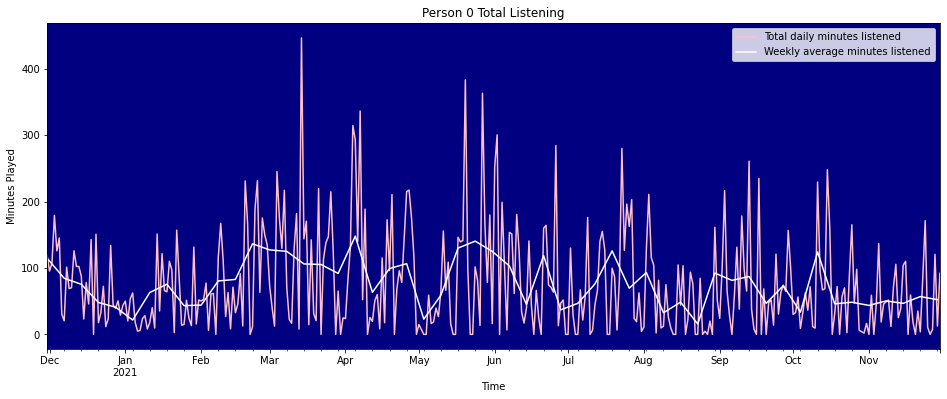

In [19]:
# Plot the daily total minutes listened for person 0
ax = total_listening_p0.plot(color='pink')

# Plot the weekly average minutes listened
total_listening_p0.resample('W').mean().fillna(0).plot(color='white',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 0 Total Listening')

Text(0.5, 1.0, 'Person 1 Total Listening')

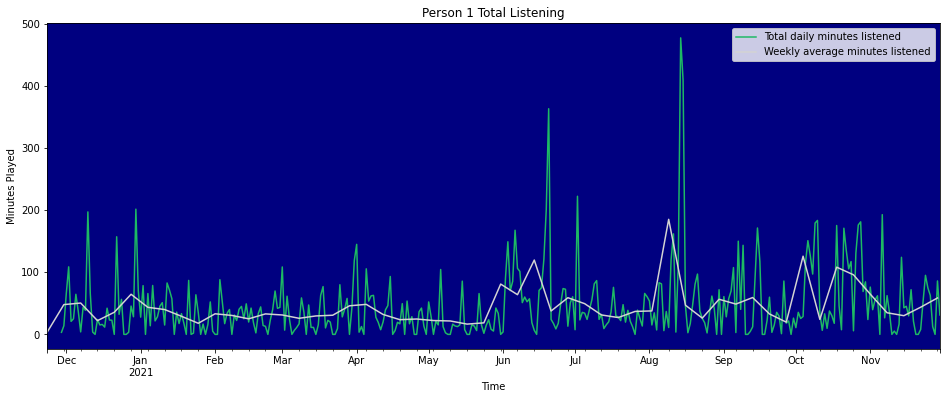

In [20]:
# Plot the daily total minutes listened for person 1
ax = total_listening_p1.plot(color='#1DB964')

# Plot the weekly average minutes listened
total_listening_p1.resample('W').mean().fillna(0).plot(color='lightgrey',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 1 Total Listening')

Text(0.5, 1.0, 'Person 2 Total Listening')

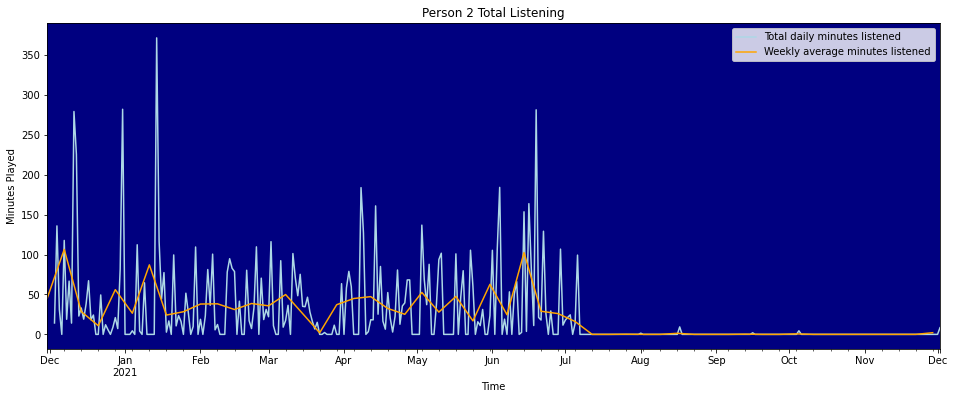

In [21]:
# Plot the daily total minutes listened for person 2
ax = total_listening_p2.plot(color='lightblue')

# Plot the weekly average minutes listened
total_listening_p2.resample('W').mean().fillna(0).plot(color='orange',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 2 Total Listening')

# Now let's look at the top artists and top songs for each person

In [22]:
# Create a dictionary to hold top artists and top songs for each person
total_tops = {}

In [23]:
# Find top artists for person 0 by total minutes played
p0_top_artists = p0_listening_history.groupby(by=['artistName'])['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 0 Top Artists by Total Minutes Played')
print('-'*10)
p0_top_artists

Person 0 Top Artists by Total Minutes Played
----------


artistName
blackbear      1036.423067
Drake           904.620567
Kanye West      633.124917
Kehlani         585.065617
Jorja Smith     506.047317
Name: minPlayed, dtype: float64

In [24]:
total_tops[0] = {}

In [25]:
total_tops[0]['artists'] = list(p0_top_artists.index)

In [26]:
print(total_tops)

{0: {'artists': ['blackbear', 'Drake', 'Kanye West', 'Kehlani', 'Jorja Smith']}}


In [27]:
# Find top tracks for person 0 by total minutes played
p0_top_tracks = p0_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 0 Top Tracks by Total Minutes Played')
print('-'*10)
p0_top_tracks

Person 0 Top Tracks by Total Minutes Played
----------


trackName
From Time                                                       232.890133
I Might Need Security                                           197.837850
Got Me (with Ari Lennox & Omen feat. Ty Dolla $ign & Dreezy)    186.256983
Made Love First                                                 172.483483
Josslyn                                                         165.979067
Name: minPlayed, dtype: float64

In [28]:
# Add top tracks to tops dictionary at key 0
total_tops[0]['tracks'] = list(p0_top_tracks.index)

In [29]:
# Find top artists for person 1 by total minutes played
p1_top_artists = p1_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 1 Top Artists by Total Minutes Played')
print('-'*10)
p1_top_artists

Person 1 Top Artists by Total Minutes Played
----------


artistName
Porter Robinson    789.444750
Drake              753.647867
Young Thug         624.920700
DaBaby             624.233150
YNW Melly          618.575383
Name: minPlayed, dtype: float64

In [30]:
# Find top tracks for person 1 by total minutes played
p1_top_tracks = p1_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 1 Top Tracks by Total Minutes Played')
print('-'*10)
p1_top_tracks

Person 1 Top Tracks by Total Minutes Played
----------


trackName
Take Kare (feat. Lil Baby & Lil Durk)    181.713317
Me Too                                   136.665617
What’s Next                              128.014450
SYLVIA (feat. 2forwOyNE)                 121.373033
Masterpiece                              113.668267
Name: minPlayed, dtype: float64

In [31]:
total_tops[1] = {}

total_tops[1]['artists'] = list(p1_top_artists.index)
total_tops[1]['tracks'] = list(p1_top_tracks.index)

In [32]:
# Find top artists for person 2 by total minutes played
p2_top_artists = p2_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 2 Top Artists by Total Minutes Played')
print('-'*10)
p2_top_artists

Person 2 Top Artists by Total Minutes Played
----------


artistName
Cage The Elephant    703.511667
Lost Frequencies     676.419117
Vampire Weekend      620.063500
Nora En Pure         605.825583
Bo Burnham           545.488550
Name: minPlayed, dtype: float64

In [33]:
# Find top tracks for person 2 by total minutes played
p2_top_tracks = p2_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

print('Person 2 Top Tracks by Total Minutes Played')
print('-'*10)
p2_top_tracks

Person 2 Top Tracks by Total Minutes Played
----------


trackName
How Long?                                  131.762033
I Know The End                              97.099233
Comedy                                      85.013650
Electricity (feat. Dua Lipa) - MK Remix     79.827400
Tears In Your Eyes                          77.990233
Name: minPlayed, dtype: float64

In [34]:
total_tops[2] = {}

total_tops[2]['artists'] = list(p2_top_artists.index)
total_tops[2]['tracks'] = list(p2_top_tracks.index)

In [35]:
print('Now we have the top 5 artists, and top 5 tracks for each person stored')
print('---'*10)

for k,v in total_tops.items():
  print(v['artists'])

Now we have the top 5 artists, and top 5 tracks for each person stored
------------------------------
['blackbear', 'Drake', 'Kanye West', 'Kehlani', 'Jorja Smith']
['Porter Robinson', 'Drake', 'Young Thug', 'DaBaby', 'YNW Melly']
['Cage The Elephant', 'Lost Frequencies', 'Vampire Weekend', 'Nora En Pure', 'Bo Burnham']


We will now visualize the top artists and tracks for each person over time

#Visualization of Top artists:

Start with person 0...

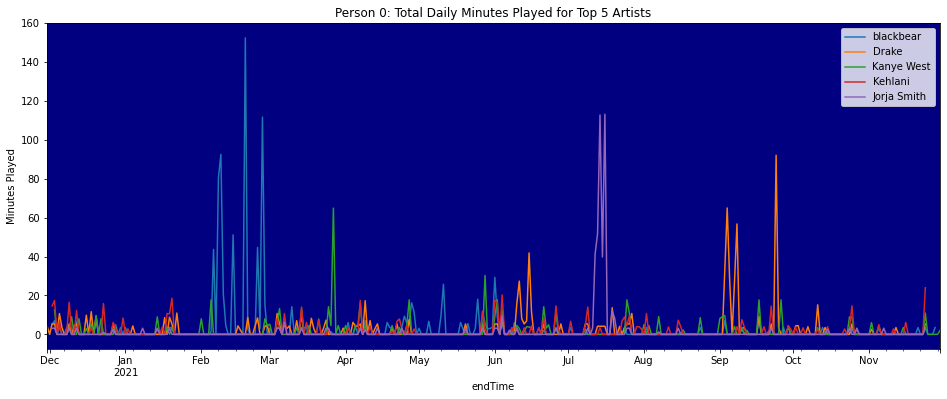

In [36]:
ax = p0_listening_history[p0_listening_history['artistName']==total_tops[0]['artists'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 0: Total Daily Minutes Played for Top 5 Artists')
for artist in total_tops[0]['artists'][1:]:
  p0_listening_history[p0_listening_history['artistName']==f'{artist}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[0]['artists']), facecolor='white')
plt.show()

Now show person 1...

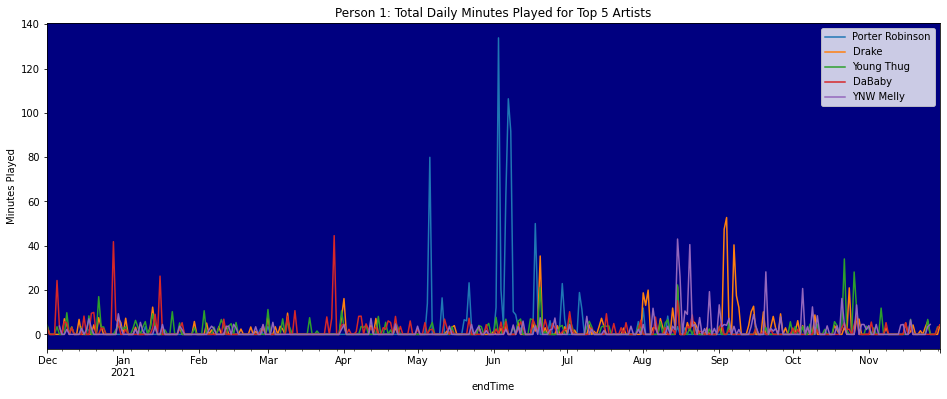

In [37]:
ax = p1_listening_history[p1_listening_history['artistName']==total_tops[1]['artists'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 1: Total Daily Minutes Played for Top 5 Artists')
for artist in total_tops[1]['artists'][1:]:
  p1_listening_history[p1_listening_history['artistName']==f'{artist}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[1]['artists']), facecolor='white')
plt.show()

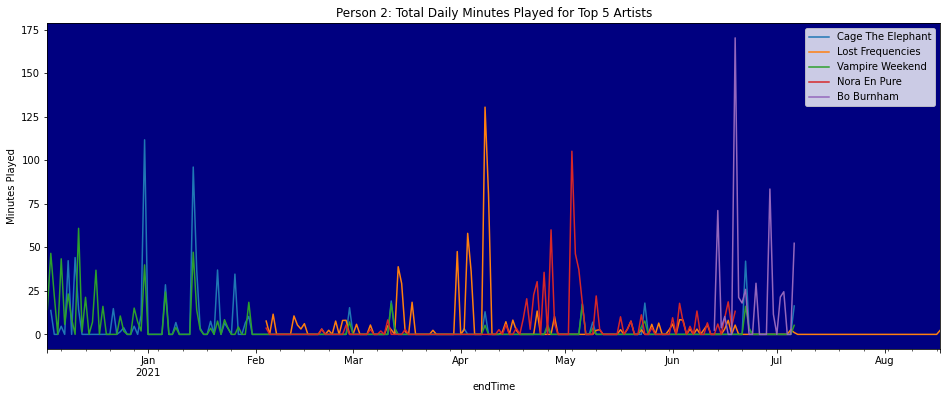

In [38]:
ax = p2_listening_history[p2_listening_history['artistName']==total_tops[2]['artists'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 2: Total Daily Minutes Played for Top 5 Artists')
for artist in total_tops[2]['artists'][1:]:
  p2_listening_history[p2_listening_history['artistName']==f'{artist}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[2]['artists']), facecolor='white')
plt.show()

# Visualizing Top tracks:

Person 0 top tracks visualized:

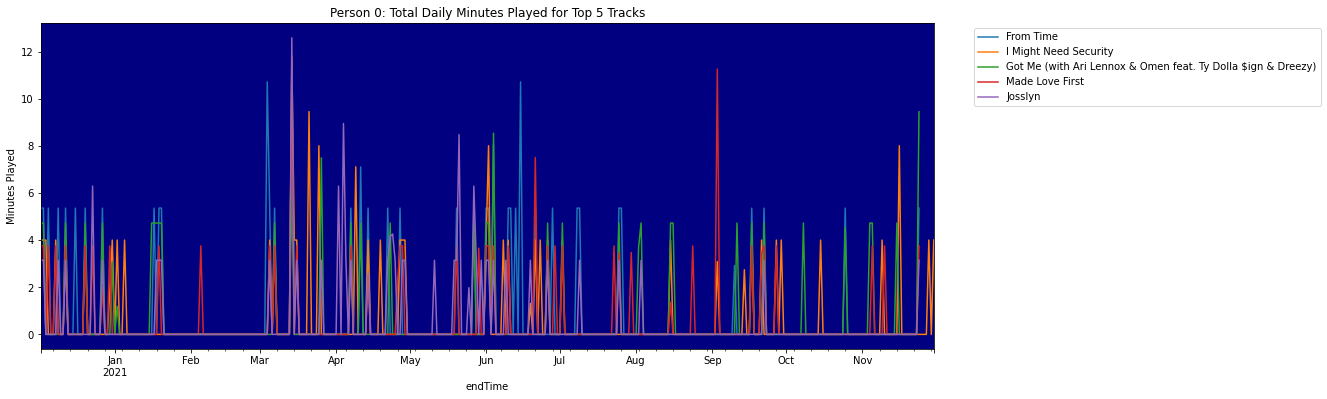

In [39]:
ax = p0_listening_history[p0_listening_history['trackName']==total_tops[0]['tracks'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 0: Total Daily Minutes Played for Top 5 Tracks')
for track in total_tops[0]['tracks'][1:]:
  p0_listening_history[p0_listening_history['trackName']==f'{track}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[0]['tracks']), bbox_to_anchor=(1.04,1), facecolor='white')
plt.show()

Person 1 top tracks visualized:

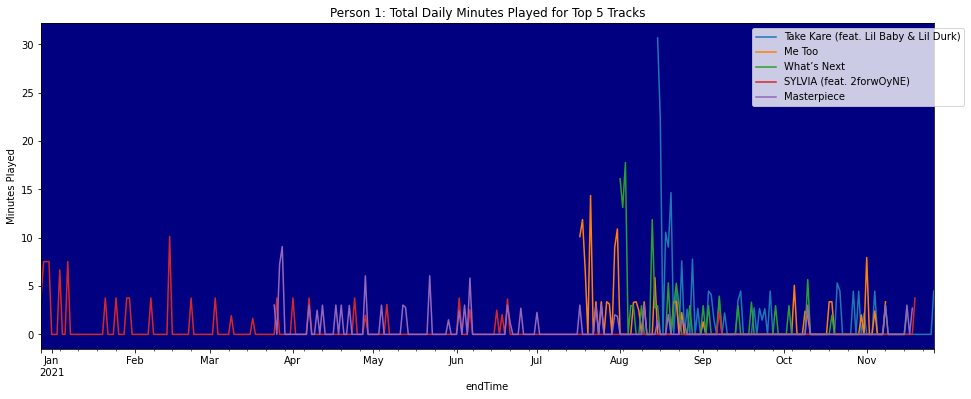

In [40]:
ax = p1_listening_history[p1_listening_history['trackName']==total_tops[1]['tracks'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 1: Total Daily Minutes Played for Top 5 Tracks')
for track in total_tops[1]['tracks'][1:]:
  p1_listening_history[p1_listening_history['trackName']==f'{track}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[1]['tracks']), bbox_to_anchor=(1.04,1), facecolor='white')
plt.show()

Person 2 top tracks visualized:

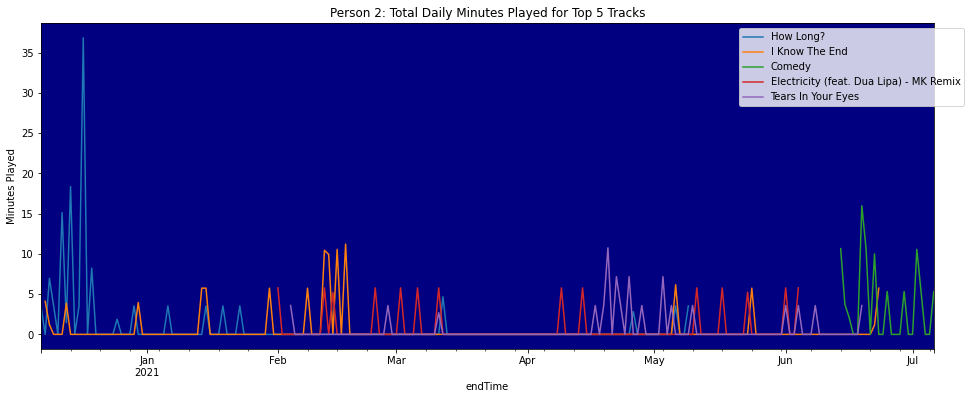

In [41]:
ax = p2_listening_history[p2_listening_history['trackName']==total_tops[2]['tracks'][0]].resample('D')['minPlayed'].sum().fillna(0).plot()
ax.set_ylabel('Minutes Played')
ax.set_title('Person 2: Total Daily Minutes Played for Top 5 Tracks')
for track in total_tops[2]['tracks'][1:]:
  p2_listening_history[p2_listening_history['trackName']==f'{track}'].resample('D')['minPlayed'].sum().fillna(0).plot()

ax.legend((total_tops[2]['tracks']), bbox_to_anchor=(1.04,1), facecolor='white')
plt.show()

# World Map Visualization of Top Artists' Birth Place


In [42]:
# Import the beautifulsoup 
# and request libraries of python.
import requests
import bs4
import regex as re

In [43]:
# Import folium for map and marker
import folium

In [44]:
'''
  Function for displaying the interactive map in the notebook on github

  Attribution:
  https://deepnote.com/project/Folium-in-Deepnote-mtSBtVdWRxCoOS4Sng2dlA/%2Fnotebook.ipynb/#00001-47ac91fa-af01-4df9-9100-bbb84177f93d
'''

from IPython.core.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

Gathered dataset containing world city information. We will use this to match the artist city with the latitude/longitude for mapping

In [45]:
# Import simplemaps world csv into dataframe
# CSV contains information for cities around the world, including lat/long for mapping
# Turn csv into dataframe
world_cities = pd.read_csv('/content/spotify-vision/simplemaps_world_cities/worldcities.csv')

world_cities.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [46]:
world_cities[world_cities['city'] == 'Thousand Oaks']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2681,Thousand Oaks,Thousand Oaks,34.1914,-118.8755,United States,US,USA,California,NaN,215029.0,1840021844


We now create a dictionary containing the top artists for each person

In [47]:
# Create dictionary to hold the list of top artists and the person who they correspond to
top_artists = {}
top_artists['artist'] = []
top_artists['person'] = []

# For each person, and list of top artists in the total_tops dictionary
# Add each artist and key (corresponding person) to new dictionary
for k,v in total_tops.items():
  for artist in v['artists']:
    top_artists['artist'].append(artist)
    top_artists['person'].append(k)


top_artists

{'artist': ['blackbear',
  'Drake',
  'Kanye West',
  'Kehlani',
  'Jorja Smith',
  'Porter Robinson',
  'Drake',
  'Young Thug',
  'DaBaby',
  'YNW Melly',
  'Cage The Elephant',
  'Lost Frequencies',
  'Vampire Weekend',
  'Nora En Pure',
  'Bo Burnham'],
 'person': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]}

In [48]:
# Create dataframe from top_artists dictionary
top_artists_location_df = pd.DataFrame.from_dict(top_artists)

In [49]:
top_artists_location_df

,artist,person
0,blackbear,0
1,Drake,0
2,Kanye West,0
3,Kehlani,0
4,Jorja Smith,0
5,Porter Robinson,1
6,Drake,1
7,Young Thug,1
8,DaBaby,1
9,YNW Melly,1


In [50]:
'''
  This function will scrape a google search page for the artist name and return the city they are from

  1. Set url for google search with search text
  2. Make request for html with requests library
  3. Using beautiful soup library, get html parsed
  4. Find tag that contains city information
  5. Create pattern to match location for each search
  6. Return matches found for 'City' group of pattern
  
'''
def get_artist_location(artist_name):
  # Make two strings with default google search URL
  # 'https://google.com/search?q=' and
  # our customized search keyword.
  # Concatenate them
  text = f'{artist_name} artist'

  url = 'https://google.com/search?q=' + text
      
    # Fetch the URL data using requests.get(url),
    # store it in a variable, request_result.
  request_result=requests.get(url)

  # print(request_result)
      
    # Creating soup from the fetched request
  soup = bs4.BeautifulSoup(request_result.text,
                            "html.parser")

  # print(soup)
    # Finding span of specific class that contains Wiki information for birth place identifying 
  origin = soup.find_all("span" , class_="XLloXe AP7Wnd")

  #print(origin)
  # Find pattern of 'City, State(or Country)'
  location_pattern = re.compile(r'(([A-Z][a-z]*\s*)+)\s*,\s*([A-Z][a-z]*)')

  # For each text in list of span, convert tags to text and search pattern. If search is not none, return 'City' group of pattern
  for text in origin:
    text = text.text
    location = re.search(location_pattern,text)
    if location is not None:
      return location.group(1)
    

In [51]:
# For each row in our artist location df, get the artist name, run through location extraction function, append to list of artist locations
locations = []
for index, row in top_artists_location_df.iterrows():
  artist_location = get_artist_location(row['artist']) 
  print(row['artist'],'-',artist_location)
  locations.append(artist_location)
print(locations)

blackbear - Daytona Beach
Drake - Toronto
Kanye West - Atlanta
Kehlani - Oakland
Jorja Smith - Walsall
Porter Robinson - Atlanta
Drake - Toronto
Young Thug - Sylvan Hills
DaBaby - Cleveland
YNW Melly - Gifford
Cage The Elephant - Bowling Green
Lost Frequencies - Brussels
Vampire Weekend - New York
Nora En Pure - Johannesburg
Bo Burnham - None
['Daytona Beach', 'Toronto', 'Atlanta', 'Oakland', 'Walsall', 'Atlanta', 'Toronto', 'Sylvan Hills', 'Cleveland', 'Gifford', 'Bowling Green', 'Brussels', 'New York', 'Johannesburg', None]


In [52]:
# Set city column to the list created from function
top_artists_location_df['city'] = locations

In [53]:
# Merge dataframe with world cities df left on the 'city' column to get city information where 'city' value matches

artists_location_df = top_artists_location_df.merge(world_cities,how='left', on='city')

artists_location_df

,artist,person,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,blackbear,0,Daytona Beach,Daytona Beach,29.1994,-81.0982,United States,US,USA,Florida,NaN,69186.0,1.840015e+09
1,Drake,0,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
2,Kanye West,0,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
3,Kanye West,0,Atlanta,Atlanta,33.1136,-94.1672,United States,US,USA,Texas,NaN,5526.0,1.840019e+09
4,Kehlani,0,Oakland,Oakland,37.7903,-122.2165,United States,US,USA,California,NaN,433031.0,1.840020e+09
5,Kehlani,0,Oakland,Oakland,41.0313,-74.2408,United States,US,USA,New Jersey,NaN,12926.0,1.840001e+09
6,Kehlani,0,Oakland,Oakland,35.2256,-89.5372,United States,US,USA,Tennessee,NaN,8891.0,1.840016e+09
7,Kehlani,0,Oakland,Oakland,44.5595,-69.7328,United States,US,USA,Maine,NaN,6274.0,1.840053e+09
8,Jorja Smith,0,Walsall,Walsall,52.5800,-1.9800,United Kingdom,GB,GBR,Walsall,NaN,67594.0,1.826656e+09
9,Porter Robinson,1,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09


In [54]:
# Drop rows where artist city returned multiple States
artists_location_df.drop_duplicates(subset=['artist','person'], inplace=True)

artists_location_df

,artist,person,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,blackbear,0,Daytona Beach,Daytona Beach,29.1994,-81.0982,United States,US,USA,Florida,NaN,69186.0,1.840015e+09
1,Drake,0,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
2,Kanye West,0,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
4,Kehlani,0,Oakland,Oakland,37.7903,-122.2165,United States,US,USA,California,NaN,433031.0,1.840020e+09
8,Jorja Smith,0,Walsall,Walsall,52.5800,-1.9800,United Kingdom,GB,GBR,Walsall,NaN,67594.0,1.826656e+09
9,Porter Robinson,1,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
11,Drake,1,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
12,Young Thug,1,Sylvan Hills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,DaBaby,1,Cleveland,Cleveland,41.4767,-81.6804,United States,US,USA,Ohio,NaN,1710093.0,1.840001e+09
18,YNW Melly,1,Gifford,Gifford,27.6747,-80.4102,United States,US,USA,Florida,NaN,10479.0,1.840014e+09


In [55]:
artists_location_df.dropna(subset=['lat','lng'], inplace=True)

artists_location_df

,artist,person,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,blackbear,0,Daytona Beach,Daytona Beach,29.1994,-81.0982,United States,US,USA,Florida,NaN,69186.0,1.840015e+09
1,Drake,0,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
2,Kanye West,0,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
4,Kehlani,0,Oakland,Oakland,37.7903,-122.2165,United States,US,USA,California,NaN,433031.0,1.840020e+09
8,Jorja Smith,0,Walsall,Walsall,52.5800,-1.9800,United Kingdom,GB,GBR,Walsall,NaN,67594.0,1.826656e+09
9,Porter Robinson,1,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
11,Drake,1,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
13,DaBaby,1,Cleveland,Cleveland,41.4767,-81.6804,United States,US,USA,Ohio,NaN,1710093.0,1.840001e+09
18,YNW Melly,1,Gifford,Gifford,27.6747,-80.4102,United States,US,USA,Florida,NaN,10479.0,1.840014e+09
19,Cage The Elephant,2,Bowling Green,Bowling Green,36.9719,-86.4373,United States,US,USA,Kentucky,NaN,95135.0,1.840013e+09


In [57]:
map = folium.Map(location=[artists_location_df['lat'].mean(), 
                           artists_location_df["lng"].mean()], 
                 zoom_start=3, control_scale=True)

folium.TileLayer('stamentoner').add_to(map)

for index, location_info in artists_location_df.iterrows():
  if location_info.person == 0:
    type_color = 'blue'
  elif location_info.person == 1:
    type_color = 'pink'
  else:
    type_color = 'lightgreen'
  folium.Marker([location_info["lat"], location_info["lng"]], popup=f'Artist: {location_info["artist"]} City: {location_info["city"]} Country: {location_info["country"]}', icon=folium.Icon(color=f'{type_color}')).add_to(map)

map